In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# Set dafault parameters
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.titlesize"] = 19
plt.rcParams['axes.labelsize'] = 16
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [118]:
# import data and info
data= pd.read_csv('Covid19Casos.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274758 entries, 0 to 9274757
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [215]:
# Transpose data.head() so we can see all columns
data.head().T

,0,1,2,3,4
sexo,M,F,F,F,F
edad,54,52,22,43,33
pais,Argentina,Argentina,Argentina,Argentina,Argentina
provincia,Buenos Aires,CABA,Buenos Aires,CABA,CABA
fecha_inicio_sintomas,NaT,NaT,2021-04-05 00:00:00,NaT,NaT
fecha_internacion,NaT,NaT,NaT,NaT,NaT
terapia_intensiva,NO,NO,NO,NO,NO
fallecido,NO,NO,NO,NO,NO
fecha_fallecimiento,NaT,NaT,NaT,NaT,NaT
asistencia_respiratoria,NO,NO,NO,NO,NO


In [120]:
# Drop irrelevant columns for this analisis
data.drop(columns=['residencia_departamento_id','residencia_provincia_id','clasificacion','origen_financiamiento',
                   'carga_provincia_id','fecha_cui_intensivo','sepi_apertura','fecha_apertura','residencia_departamento_nombre',
                   'residencia_provincia_nombre','id_evento_caso','edad_años_meses'],inplace=True)

In [122]:
# Change some columns names
data.rename(columns={'residencia_pais_nombre':'pais','carga_provincia_nombre':'provincia','cuidado_intensivo':'terapia_intensiva',
                     'asistencia_respiratoria_mecanica':'asistencia_respiratoria',
                     'clasificacion_resumen':'clasificacion'},inplace=True)

In [124]:
# Deleting entrys with ages <0
mask_wrong_age = data['edad'] <=0
mask_wrong_age[mask_wrong_age].index
data.drop(index=mask_wrong_age[mask_wrong_age].index,inplace=True)


In [149]:
# Deleting entrys with no ages
mask_age_null = data['edad'].isnull()
mask_age_null[mask_age_null].index
data.drop(index=mask_age_null[mask_age_null].index,inplace=True)

In [160]:
# Deleting entrys with ages >100
mask_wrong_age= data['edad'] >=100
data.drop(index=mask_wrong_age[mask_wrong_age].index,inplace=True)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9267588 entries, 0 to 9274757
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sexo                     object        
 1   edad                     float64       
 2   pais                     object        
 3   provincia                object        
 4   fecha_inicio_sintomas    datetime64[ns]
 5   fecha_internacion        datetime64[ns]
 6   terapia_intensiva        object        
 7   fallecido                object        
 8   fecha_fallecimiento      datetime64[ns]
 9   asistencia_respiratoria  object        
 10  clasificacion            object        
 11  fecha_diagnostico        datetime64[ns]
 12  ultima_actualizacion     datetime64[ns]
dtypes: datetime64[ns](5), float64(1), object(7)
memory usage: 989.9+ MB


In [179]:
# Change some date columns to datetime type
to_date = ['fecha_inicio_sintomas','fecha_internacion','fecha_fallecimiento','fecha_diagnostico', 'ultima_actualizacion']
for i in to_date:
    data[i]=pd.to_datetime(data[i],format="%Y%m/%d")

In [229]:
#set fecha_diagnostico = fecha_inicio_sintomas for earlier dates than pandemic begining
wrong_dates = data['fecha_diagnostico'] < '2020-01-01'
data.loc[wrong_dates,'fecha_diagnostico'] = data.loc[wrong_dates,'fecha_inicio_sintomas']

In [233]:
data.head()

,sexo,edad,pais,provincia,fecha_inicio_sintomas,fecha_internacion,terapia_intensiva,fallecido,fecha_fallecimiento,asistencia_respiratoria,clasificacion,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Argentina,Buenos Aires,NaT,NaT,NO,NO,NaT,NO,Descartado,2020-06-09,2021-04-20
1,F,52.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-20
2,F,22.0,Argentina,Buenos Aires,2021-04-05,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-20
3,F,43.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-06,2021-04-20
4,F,33.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-20


In [242]:
#Number of diagnosed
numb_diagnosed = data['clasificacion'].count()
print(f'La cantidad de casos diagnosticados es: {cant_diagnosticadoos}')

La cantidad de casos diagnosticados es: 9267588


In [ ]:
# Some statistical information
mean_age = data['edad'].mean()
median_age = data['edad'].median()

In [414]:
def hist_plot(column,title,xlabel,ylabel):
    column_mean = int(column.mean())
    column.plot(kind='hist',alpha=0.4,edgecolor='black',color='red',grid=False,label=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.suptitle(title)
    plt.axvline(column_mean,linestyle='dashed',label=f'Mean = {column_mean}',color='b')
    plt.legend()

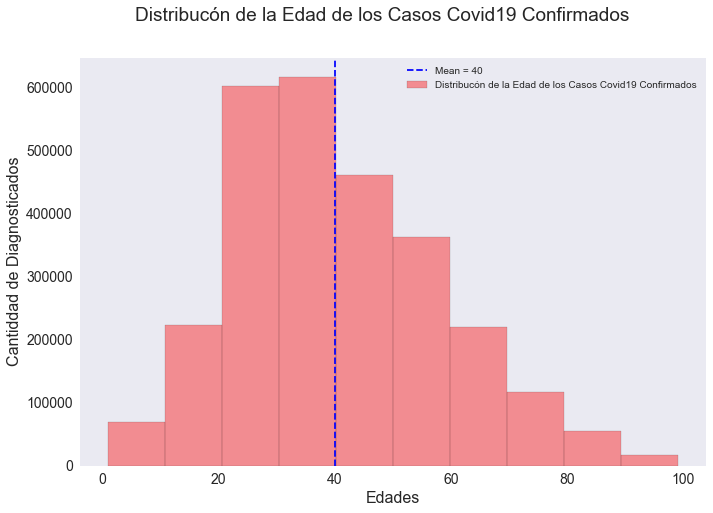

In [496]:
hist_plot(data.loc[data['clasificacion'] == 'Confirmado','edad'],title='Distribucón de la Edad de los Casos Covid19 Confirmados',
          xlabel = 'Edades', ylabel = 'Cantiddad de Diagnosticados')

In [371]:
# Some statistical information
# All
mean_age = data['edad'].mean()
median_age = data['edad'].median()



Text(0.5, 1.0, 'Porcentaje de los Diagnosticos')

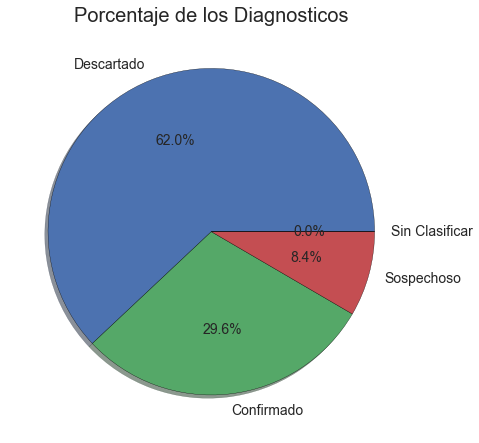

In [389]:
# Plot diagnose_type
diagnose_types = data['clasificacion'].value_counts()
diagnose_types.plot(kind='pie',wedgeprops={'edgecolor': 'black'},autopct='%1.1f%%',shadow=True)
plt.ylabel('')
plt.title('Porcentaje de los Diagnosticos')


In [ ]:
# De los confirmados, cantidad de muertos y la distribución de la edad de los muertos
data['']

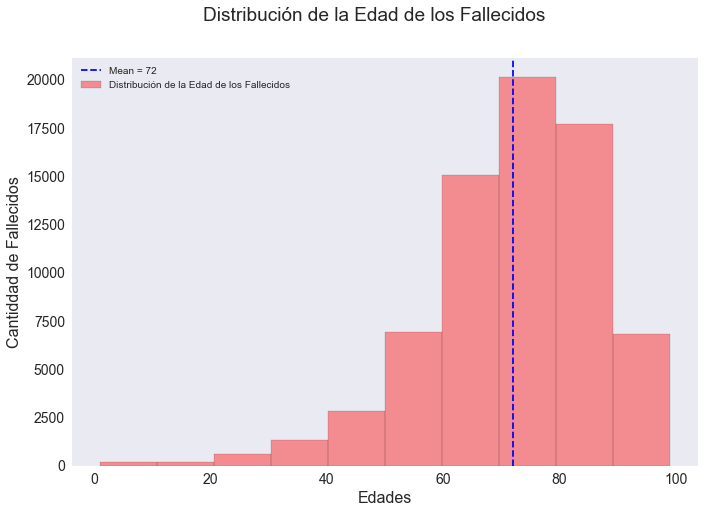

In [416]:
# Distribución de la edad de los fallecidos
fallecidos = data['fallecido'] == 'SI'
edad_fallecidos = data['edad'].loc[fallecidos]
hist_plot(edad_fallecidos,xlabel = 'Edades', ylabel = 'Cantiddad de Fallecidos',title = 'Distribución de la Edad de los Fallecidos')

In [417]:
#Cantidad de muertos
data.groupby(['fallecido','sexo']).agg({'edad':'mean'})

edad
fallecido sexo           
NO        F     39.227272
          M     38.596373
          NR    39.328578
SI        F     74.448327
          M     70.041344
          NR    80.326096

Text(0.5, 1.0, 'Fallecidos Totales por Sexo y Tipo de Internación')

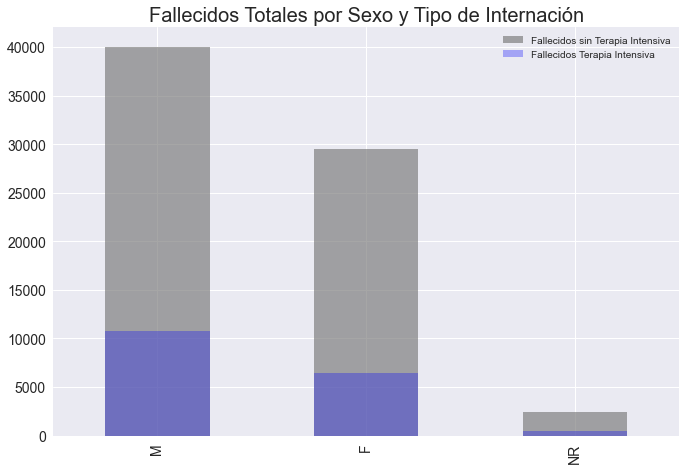

In [433]:
# De los fallecidos cuantos son hombres y cuantos mujeres
data.loc[fallecidos,'sexo'].value_counts().plot(kind='bar',color='grey',alpha=0.7, label = 'Fallecidos sin Terapia Intensiva')
data.loc[fallecios_terapia_intensiva,'sexo'].value_counts().plot(kind='bar',color='blue',alpha=0.3, label = 'Fallecidos Terapia Intensiva')
plt.legend()
plt.title('Fallecidos Totales por Sexo y Tipo de Internación')

In [429]:
#De los fallecidos cuantos necesitaron terapia_intensiva
fallecios_terapia_intensiva = fallecidos & (data['terapia_intensiva'] == 'SI')

In [437]:
confirmados = data['clasificacion'] == 'Confirmado'
confirmados_darios = data.loc[confirmados,'fecha_diagnostico'].value_counts()


DatetimeIndex(['2021-04-13', '2021-04-12', '2021-04-07', '2021-04-08',
               '2021-04-16', '2021-04-14', '2021-04-09', '2021-04-06',
               '2021-04-15', '2021-04-05',
               ...
               '2020-02-10', '2020-01-18', '2020-01-26', '2020-03-07',
               '2020-02-13', '2020-01-16', '2020-03-03', '2020-02-24',
               '2020-02-04', '2020-02-11'],
              dtype='datetime64[ns]', length=436, freq=None)

In [441]:
confirmados_darios.sort_index()

2020-01-01        3
2020-01-02       13
2020-01-04        7
2020-01-05        4
2020-01-06        8
              ...  
2021-04-16    22479
2021-04-17    14714
2021-04-18     9895
2021-04-19    18924
2021-04-20     5883
Name: fecha_diagnostico, Length: 436, dtype: int64

Text(0, 0.5, 'Cantidad de Casos')

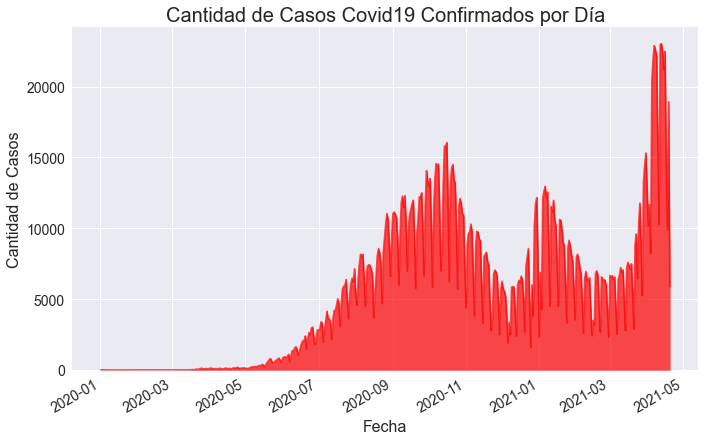

In [449]:
# Cantidad de casos confirmados por día
confirmados = data['clasificacion'] == 'Confirmado'
confirmados_darios = data.loc[confirmados,'fecha_diagnostico'].value_counts()
confirmados_darios.sort_index().plot(kind='area',alpha=0.7,color='r')
plt.title('Cantidad de Casos Covid19 Confirmados por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Casos')


Text(0.5, 0, 'Cantidad de Casos (Millones)')

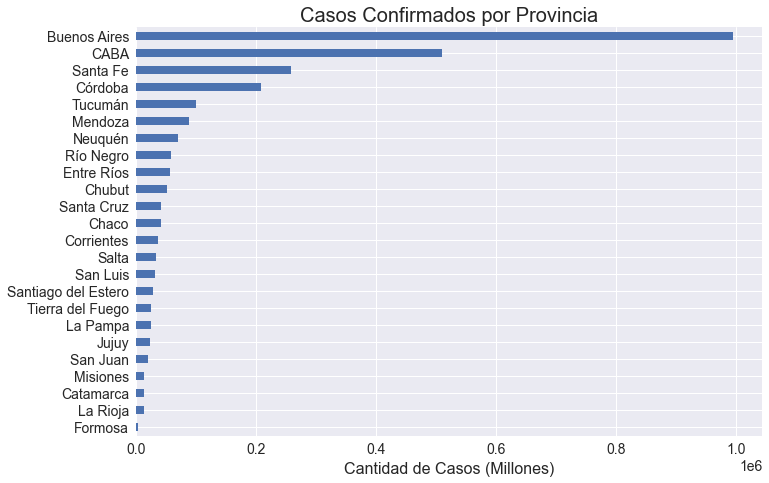

In [470]:
#Cantidad de casos por Provincia
confirmados_provincia = data.loc[confirmados,'provincia']
confirmados_provincia.value_counts()[::-1].plot(kind='barh',grid=True)
plt.title('Casos Confirmados por Provincia')
plt.xlabel('Cantidad de Casos (Millones)')

In [477]:
#Evolución de los fallecidos por fecha
recuento_fallecidos = data.loc[fallecidos,'fecha_fallecimiento'].value_counts().sort_index().cumsum()

<AxesSubplot:>

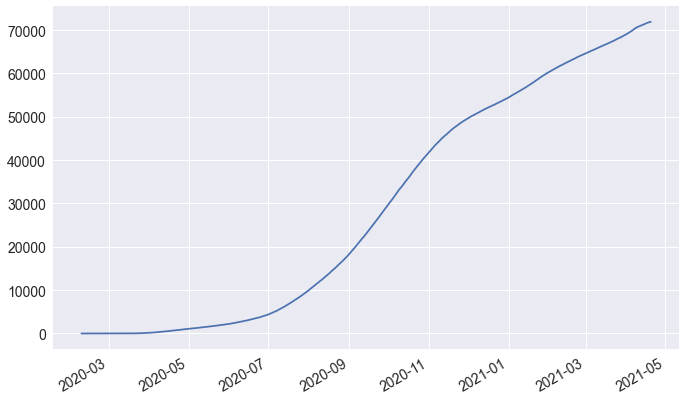

In [478]:
recuento_fallecidos.plot()

In [481]:
data.loc[confirmados,'fecha_inicio_sintomas']

16        2021-04-03
27        2021-04-03
51               NaT
58               NaT
60               NaT
             ...    
9274730          NaT
9274737          NaT
9274743   2021-04-05
9274750   2021-04-04
9274752          NaT
Name: fecha_inicio_sintomas, Length: 2741962, dtype: datetime64[ns]

In [482]:
data.loc[confirmados,'fecha_fallecimiento']

16        NaT
27        NaT
51        NaT
58        NaT
60        NaT
           ..
9274730   NaT
9274737   NaT
9274743   NaT
9274750   NaT
9274752   NaT
Name: fecha_fallecimiento, Length: 2741962, dtype: datetime64[ns]

In [492]:
dias = data.loc[confirmados,'fecha_fallecimiento'] - data.loc[confirmados,'fecha_diagnostico']

In [494]:
dias.value_counts().index.mean()

Timedelta('45 days 01:15:30.337078')